In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image

In [9]:
image = Image.open('../dolphin.jpg')
image_gray = image.convert('L')
image_np = np.array(image_gray)
image_np = image_np
print(image_np.shape)

(128, 128)


In [4]:
image_tensor = torch.tensor(image_np)
image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)
image_tensor = image_tensor.float()
print(image_tensor.dtype)

torch.float32


In [75]:
my_img = torch.tensor([[[[0.,0.,0.,1.,0.],
                         [0.,0.,1.,1.,0.],
                         [0.,1.,0.,1.,0.],
                         [0.,0.,0.,1.,0.],
                         [0.,0.,0.,1.,0.]]]])

print(my_img.shape)

torch.Size([1, 1, 5, 5])


In [5]:
my_img_np = image_tensor[0,0].numpy()

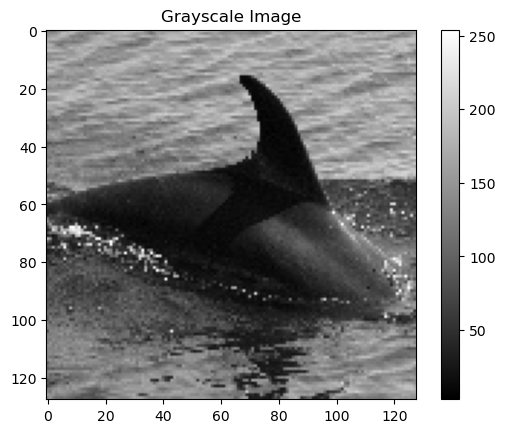

In [11]:
plt.imshow(image_np, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.colorbar()  # Optional: add a colorbar
plt.title("Grayscale Image")
plt.show()

In [13]:
print(image_np.shape)

(128, 128)


In [123]:
conv_layer1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)


with torch.no_grad():  # No gradient computation for manual setting
    conv_layer1.weight = nn.Parameter(torch.tensor([[
[[-1,  0,  1],
 [-1,  0,  1],
 [-1,  0,  1]]
    ]], dtype=torch.float32))

out_img = conv_layer1(image_tensor)
print(out_img)
print(conv_layer1.weight)

tensor([[[[ 0.9725, -0.0157,  0.0510,  ...,  0.0118,  0.0588, -1.2431],
          [ 1.5882,  0.0510,  0.0745,  ...,  0.1373,  0.2039, -1.9020],
          [ 1.8353,  0.0902,  0.0667,  ...,  0.2000,  0.2039, -2.0157],
          ...,
          [ 1.5137,  0.0824,  0.1255,  ..., -0.0235, -0.0078, -2.0118],
          [ 1.6039, -0.0157, -0.1216,  ..., -0.0392, -0.0196, -1.8196],
          [ 1.1451, -0.0824, -0.2039,  ..., -0.0588, -0.0588, -1.1686]]]],
       grad_fn=<ConvolutionBackward0>)
Parameter containing:
tensor([[[[-1.,  0.,  1.],
          [-1.,  0.,  1.],
          [-1.,  0.,  1.]]]], requires_grad=True)


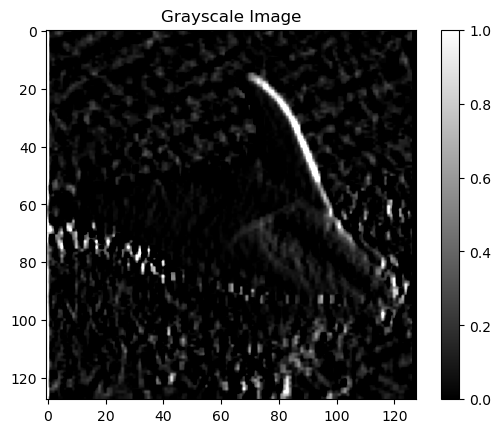

In [124]:
my_out_img_np = out_img[0,0].detach().numpy()
plt.imshow(my_out_img_np, cmap='gray', vmin=0, vmax=1)  # Use 'gray' colormap for grayscale images
plt.colorbar()  # Optional: add a colorbar
plt.title("Grayscale Image")
plt.show()

In [1]:
import optuna

/home/radtklau/anaconda3/envs/amls-project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

In [3]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2024-06-24 14:54:44,247] A new study created in memory with name: no-name-b6478a90-8a52-4159-9b2e-20179c264063
[I 2024-06-24 14:54:44,250] Trial 0 finished with value: 19.873427056166936 and parameters: {'x': -2.457962208920903}. Best is trial 0 with value: 19.873427056166936.
[I 2024-06-24 14:54:44,252] Trial 1 finished with value: 49.93630192346984 and parameters: {'x': 9.066562242241261}. Best is trial 0 with value: 19.873427056166936.
[I 2024-06-24 14:54:44,253] Trial 2 finished with value: 55.55610447720063 and parameters: {'x': 9.453596747691723}. Best is trial 0 with value: 19.873427056166936.
[I 2024-06-24 14:54:44,256] Trial 3 finished with value: 44.85315286476171 and parameters: {'x': 8.697249649278554}. Best is trial 0 with value: 19.873427056166936.
[I 2024-06-24 14:54:44,258] Trial 4 finished with value: 70.44600383162756 and parameters: {'x': -6.393211770927001}. Best is trial 0 with value: 19.873427056166936.
[I 2024-06-24 14:54:44,259] Trial 5 finished with value: 1

In [4]:
study.best_params

{'x': 2.0304189360830147}